# **Resampling Datetime Data**

_John Andrew Dixon_

---

##### **Imports**

In [1]:
import pandas as pd

##### **Data Load**

In [2]:
# Remote URL to data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRUYt14HmU-FcylS-9o7kn-rHrHcTwZvpOeL-7NgpOiaTrpROPDqOB1Ulf7XJoc8npblAYEjsCxNJIC/pub?output=csv"
# Load the data
df = pd.read_csv(url)
# Verify it loaded
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


---

## **Load the data and make a datetime index**

In [5]:
# Convert the date column to datetime dtype.
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [6]:
# Set the date column as the index.
df.set_index("date", inplace=True)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [12]:
# Keep only data from the year 2000 or later.
# Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
final_df = df.loc["2000":].drop(columns=["cloud_cover", "sunshine", "global_radiation", "pressure"])
final_df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [14]:
# Gauge missing values
final_df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

<AxesSubplot: xlabel='date'>

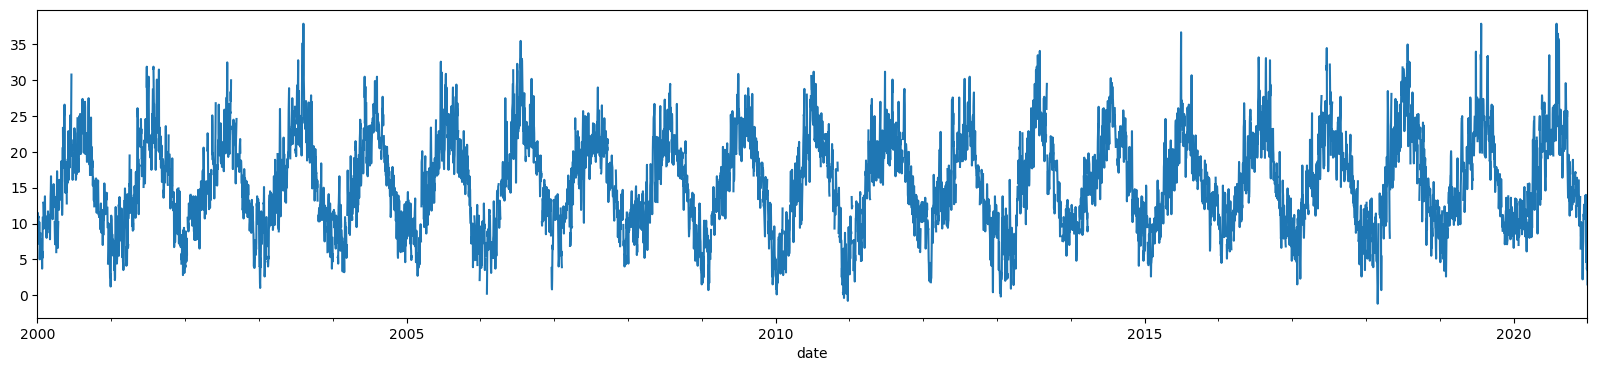

In [18]:
final_df["max_temp"].plot(figsize=(20, 4))

## **Answer the Questions with Visualizations (Using the Correct Frequency)**